In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.core.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/content/volkswagen_e_golf.csv")
df

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Volkswagen,Golf,e-Golf,85,20.12.2014,26,5.62,Electricity,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,Volkswagen,Golf,e-Golf,85,20.12.2014,77,14.25,Electricity,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,Volkswagen,Golf,e-Golf,85,19.12.2014,26,4.97,Electricity,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,Volkswagen,Golf,e-Golf,85,19.12.2014,20,4.76,Electricity,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


In [3]:
# Variable count
print("Number of variables : ", len(df.columns))

Number of variables :  18


In [4]:
# Data types 
df.dtypes

manufacturer               object
model                      object
version                    object
power(kW)                   int64
fuel_date                  object
trip_distance(km)          object
quantity(kWh)             float64
fuel_type                  object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
dtype: object

In [5]:
df['city'].value_counts()
df['motor_way'].value_counts()
df['country_roads'].value_counts()
df['A/C'].value_counts()
df['park_heating'].value_counts()

0    2714
1     631
Name: park_heating, dtype: int64

In [6]:
def tryconvert(value, default, t):
    if t == 'numeric':
        try:
            return float(value)
        except (ValueError, TypeError):
            return default
    if t == 'str':
        try:
            return str(value)
        except (ValueError, TypeError):
            return default

In [7]:
df['trip_distance(km)'] = df['trip_distance(km)'].map(lambda x : tryconvert(x, np.nan, 'numeric') )

In [8]:
df.dtypes
display(df.head(5))

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80.0,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50.0,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43.0,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44.0,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76.0,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [9]:
# Observing nonstandard data in Object variables

print("power")
display(df['power(kW)'].value_counts())

# manufacturer
print("Manufacturers")
display(df['manufacturer'].value_counts())

# models
print("Models")
display(df['model'].value_counts())

# versions
print("Versions")
display(df['version'].value_counts())

# fuel type
print("Fuel type")
display(df['fuel_type'].value_counts())

# type type
print("tire type")
display(df['tire_type'].value_counts())

# driving_style
print("driving_style")
display(df['driving_style'].value_counts())

power


85    3345
Name: power(kW), dtype: int64

Manufacturers


Volkswagen    3345
Name: manufacturer, dtype: int64

Models


Golf    3345
Name: model, dtype: int64

Versions


e-Golf    3345
Name: version, dtype: int64

Fuel type


Electricity    3345
Name: fuel_type, dtype: int64

tire type


Summer tires    1826
Winter tires    1519
Name: tire_type, dtype: int64

driving_style


Moderate    2334
Normal       912
Fast          99
Name: driving_style, dtype: int64

In [10]:
# standard missing values
df.isnull().sum()[df.isnull().sum() > 0]

trip_distance(km)     4
quantity(kWh)         1
avg_speed(km/h)      13
dtype: int64

In [11]:
# We cannot impute quantity (kWh) and there are only one missing value. We will drop that row.
df.drop(axis = 0, index = 0, inplace=True)

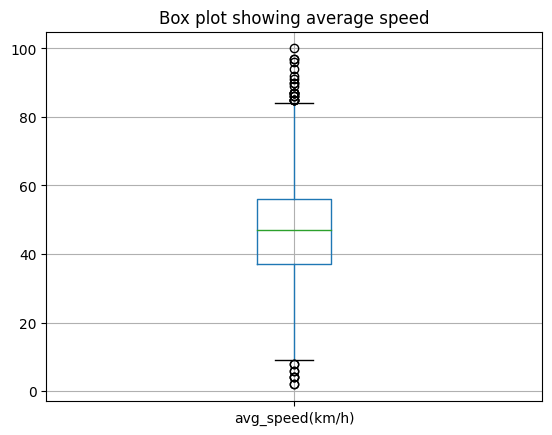

In [12]:
plt.title('Box plot showing average speed')

df.boxplot(['avg_speed(km/h)'])
plt.show()

In [13]:
df['avg_speed(km/h)'].describe()

count    3331.000000
mean       46.745392
std        16.273316
min         2.000000
25%        37.000000
50%        47.000000
75%        56.000000
max       100.000000
Name: avg_speed(km/h), dtype: float64

In [14]:
df['avg_speed(km/h)'].mode()

0    49.0
Name: avg_speed(km/h), dtype: float64

In [15]:
null_avg_spd_df = df[df['avg_speed(km/h)'].isnull()]

for index, row in df.iterrows() :
    if index not in null_avg_spd_df.index : 
        a = 10
    else :
        mean = df[
            (df['city'] == row['city']) &
            (df['motor_way'] == row['motor_way']) &
            (df['country_roads'] == row['country_roads']) &
            (df['driving_style'] == row['driving_style'])
        ]['avg_speed(km/h)'].mean()
        median = df[
            (df['city'] == row['city']) &
            (df['motor_way'] == row['motor_way']) &
            (df['country_roads'] == row['country_roads']) &
            (df['driving_style'] == row['driving_style'])
        ]['avg_speed(km/h)'].median()

     
        if(abs(mean - median) > 5) :
            df.loc[index, 'avg_speed(km/h)'] = median
        else :
            df.loc[index, 'avg_speed(km/h)'] = mean

In [16]:
# Check the missing values again.
df.isnull().sum()[df.isnull().sum() > 0]

trip_distance(km)    4
dtype: int64

In [17]:
target_null_rows_df = df[df['trip_distance(km)'].isnull()]

df.drop(axis = 0, index = target_null_rows_df.index, inplace=True)

In [18]:
# Check the missing values again.
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

In [19]:
df.drop(axis = 1, columns = ['manufacturer', 'model', 'version', 'power(kW)', 'fuel_type', 'fuel_date'], inplace=True)
#  Check the sample data set
display(df.head(5))

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,50.0,12.29,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,43.0,8.68,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,44.0,1.50,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,76.0,14.44,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
5,15.0,6.84,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7


#EDA Technique

#Univariate Analysis

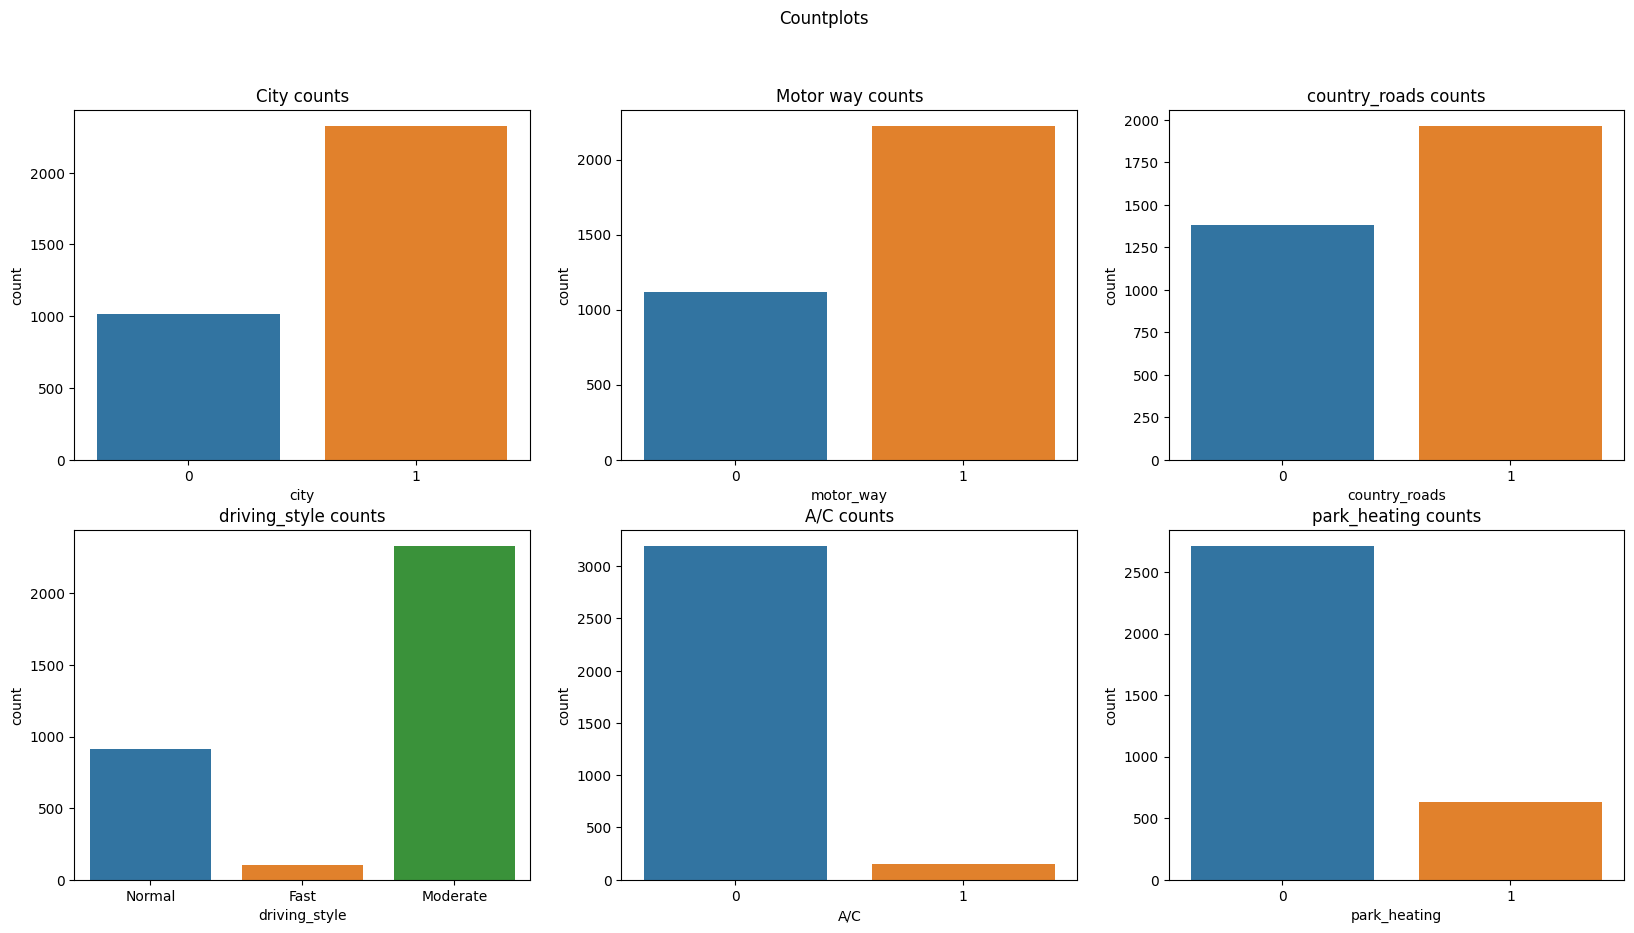

In [20]:
# city
plt.figure(figsize=(20, 10))
plt.suptitle("Countplots")
plt.subplot(2, 3, 1)
plt.title("City counts")
sns.countplot(x=df['city'])

plt.subplot(2, 3, 2)
plt.title("Motor way counts")
sns.countplot(x=df['motor_way'])

plt.subplot(2, 3, 3)
plt.title("country_roads counts")
sns.countplot(x=df['country_roads'])

plt.subplot(2, 3, 4)
plt.title("driving_style counts")
sns.countplot(x=df['driving_style'])

plt.subplot(2, 3, 5)
plt.title("A/C counts")
sns.countplot(x=df['A/C'])

plt.subplot(2, 3, 6)
plt.title("park_heating counts")
sns.countplot(x=df['park_heating'])

plt.show()

<ipython-input-21-32643705f2b7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['quantity(kWh)'], kde = True)


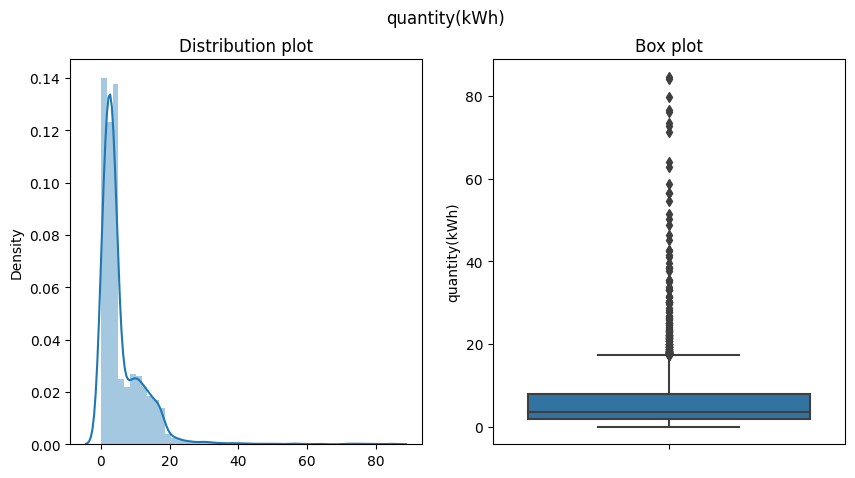

In [21]:
# quantity(kWh)
# qty = sns.load_dataset()
plt.figure(figsize=(10, 5))
plt.suptitle("quantity(kWh)")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sns.distplot(x=df['quantity(kWh)'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sns.boxplot(y=df['quantity(kWh)'])

plt.show()

<ipython-input-22-e47a7d268566>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['consumption(kWh/100km)'], kde = True)


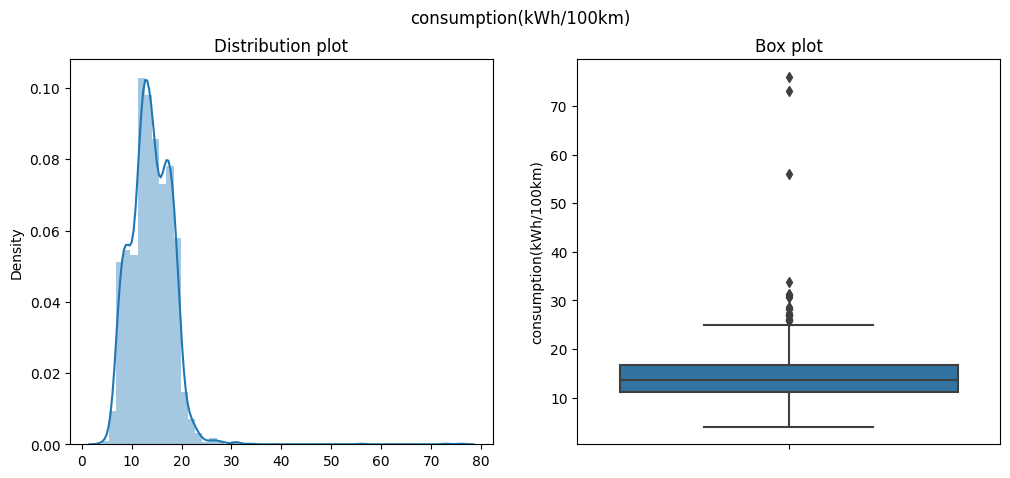

In [22]:
# consumption(kWh/100km)

plt.figure(figsize=(12, 5))
plt.suptitle("consumption(kWh/100km)")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sns.distplot(x=df['consumption(kWh/100km)'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sns.boxplot(y=df['consumption(kWh/100km)'])

plt.show()

<ipython-input-23-a65cfac2fd0d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['ecr_deviation'], kde = True)


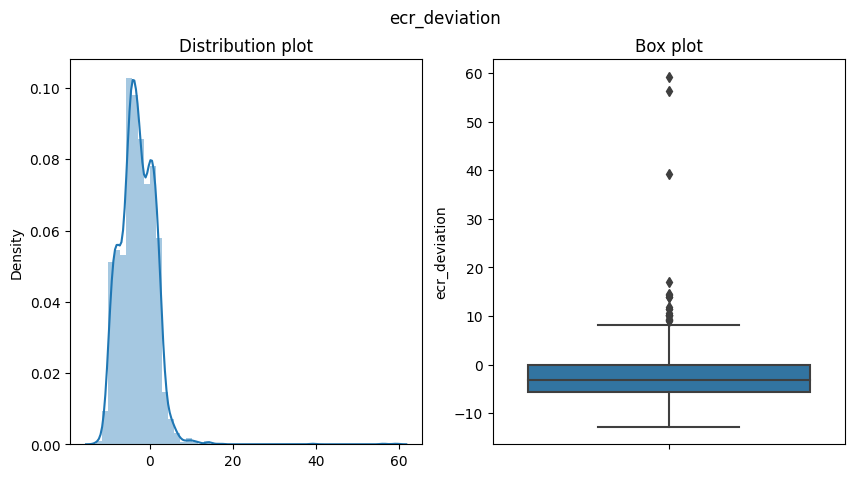

In [23]:
# ecr_deviation
plt.figure(figsize=(10, 5))
plt.suptitle("ecr_deviation")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sns.distplot(x=df['ecr_deviation'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sns.boxplot(y=df['ecr_deviation'])

plt.show()

In [24]:
df['ecr_deviation'].describe()

count    3340.000000
mean       -2.879608
std         4.183439
min       -12.800000
25%        -5.600000
50%        -3.100000
75%         0.000000
max        59.200000
Name: ecr_deviation, dtype: float64

<ipython-input-25-4de6a36932e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['avg_speed(km/h)'], kde = True)


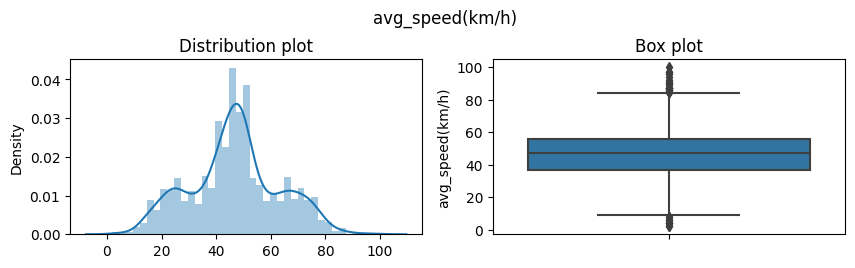

In [25]:
# avg_speed(km/h)

plt.figure(figsize=(10, 5))
plt.suptitle("avg_speed(km/h)")
plt.subplot(2, 2, 1)
plt.title("Distribution plot")
sns.distplot(x=df['avg_speed(km/h)'], kde = True)

plt.subplot(2, 2, 2)
plt.title("Box plot")
sns.boxplot(y=df['avg_speed(km/h)'])

plt.show()

#Bivarient

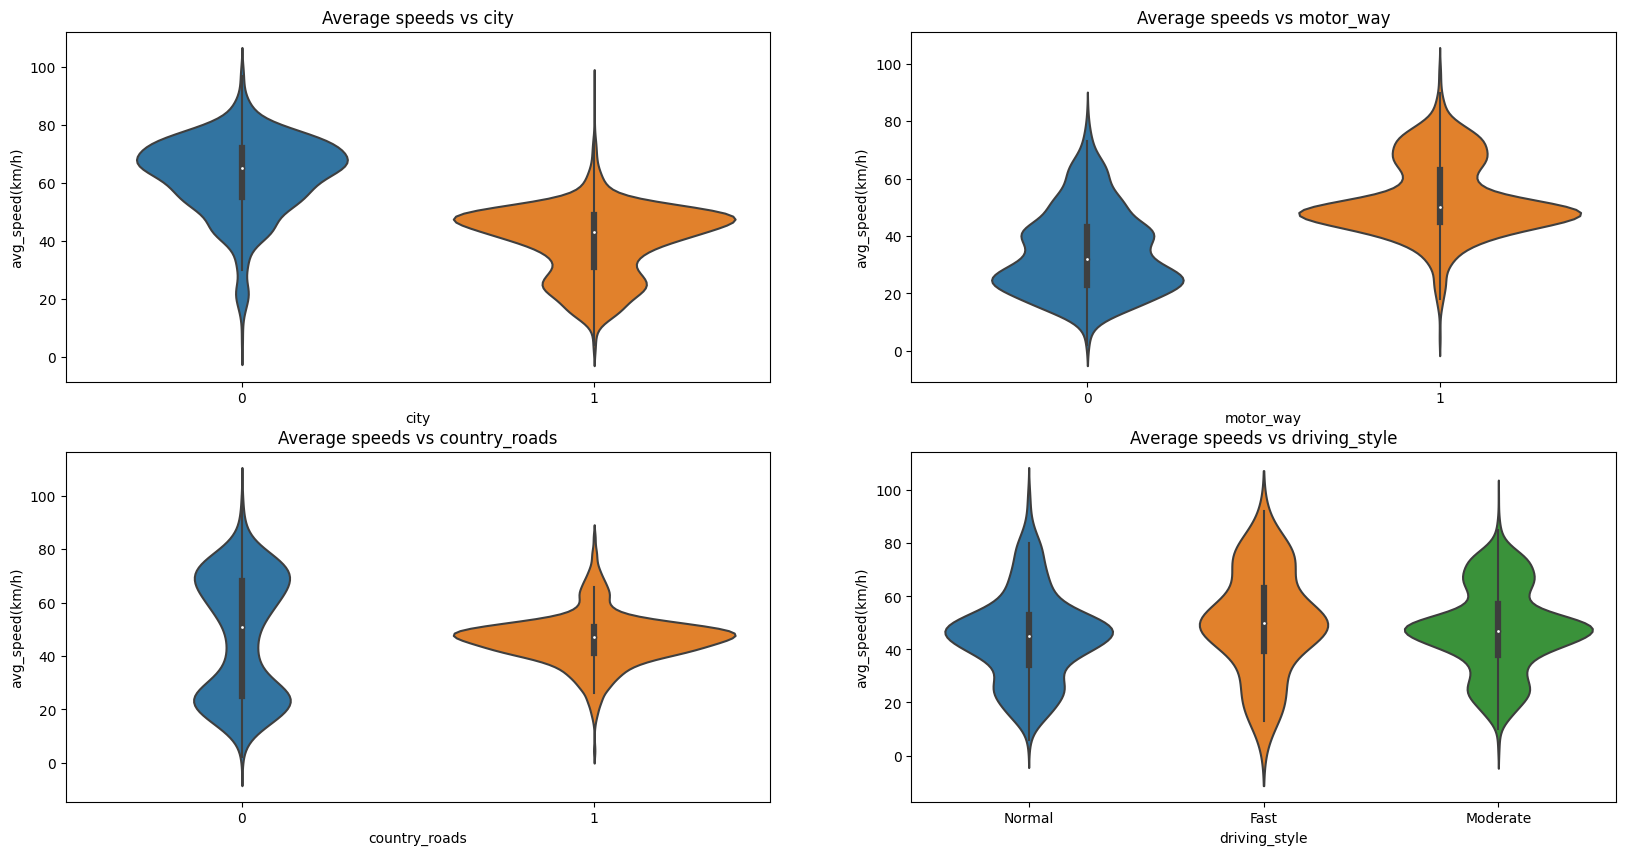

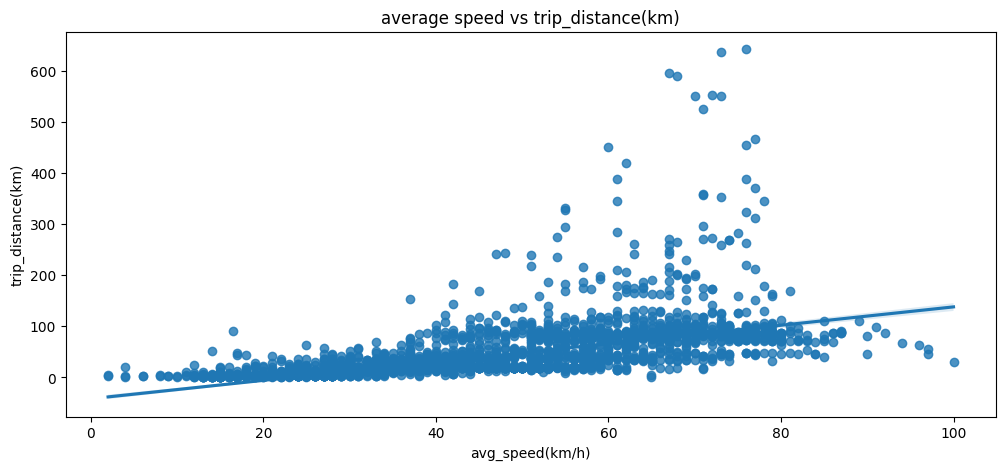

In [26]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Average speeds vs city")
sns.violinplot(x = 'city', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 2)
plt.title("Average speeds vs motor_way")
sns.violinplot(x = 'motor_way', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 3)
plt.title("Average speeds vs country_roads")
sns.violinplot(x = 'country_roads', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 4)
plt.title("Average speeds vs driving_style")
sns.violinplot(x = 'driving_style', y = 'avg_speed(km/h)', data = df)



# role of avg_speed in trip_distance
plt.figure(figsize=(12, 5))
plt.title("average speed vs trip_distance(km)")
sns.regplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = df)
plt.show()

Observation

1.   InterQuartile Range of Avg_speed is clearly separated among city's. 
2.   City '0' have higher avg speeds.

1.   InterQuartile Range of Avg_speed is clearly separated among motor_way's. 
2.   Motor_way '1' have higher avg speeds.

1.   avg speed range is widespread in countryroad '0' compare to '1'













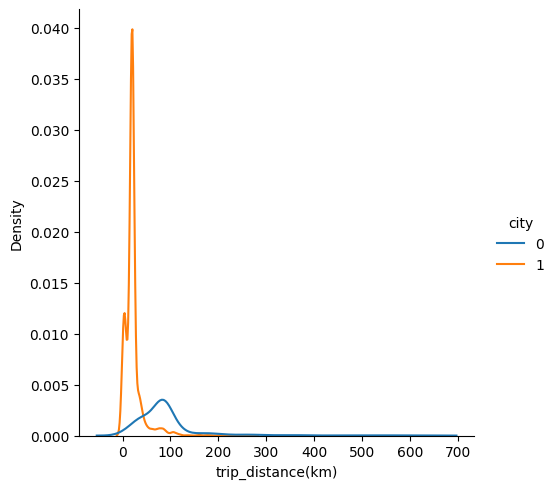

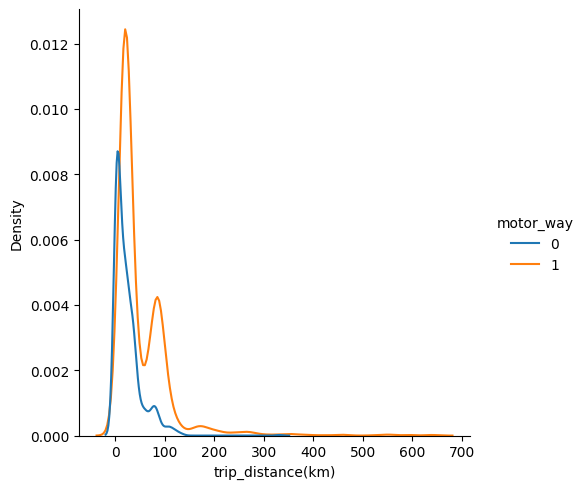

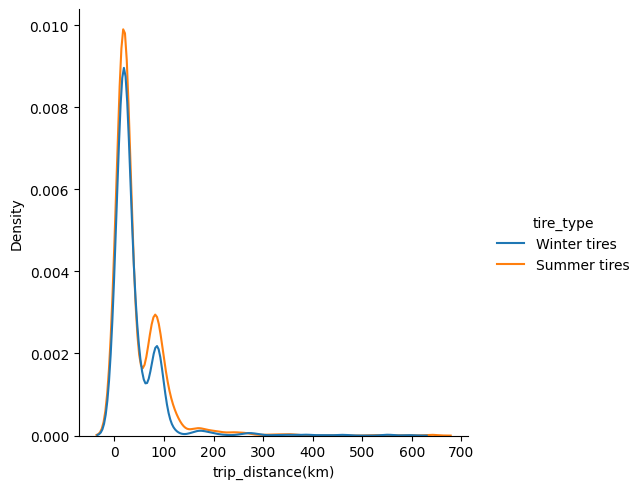

In [27]:

sns.displot(data=df, x="trip_distance(km)", kind='kde', hue='city')

sns.displot(data=df, x="trip_distance(km)", kind='kde', hue='motor_way')
# tire_type on trip distance.

sns.displot(data=df, x="trip_distance(km)", kind='kde', hue='tire_type')


Observations


1. We can see data points having an upward trend till 80 km/hr, so the avg_speed will be a feature to consider for distance range.

1.   tripdistance is lower in city =1
2.   one way have larger distance distance ranges with more frequencies in (50 - 300 km). one way has more than 350km range.

1.   trip distance distribution is same for all tire types. may be this is not a useful feature for predicting distance_range.












<Axes: title={'center': 'consumption(kWh/100km) vs trip_distance(km)'}, xlabel='consumption(kWh/100km)', ylabel='trip_distance(km)'>

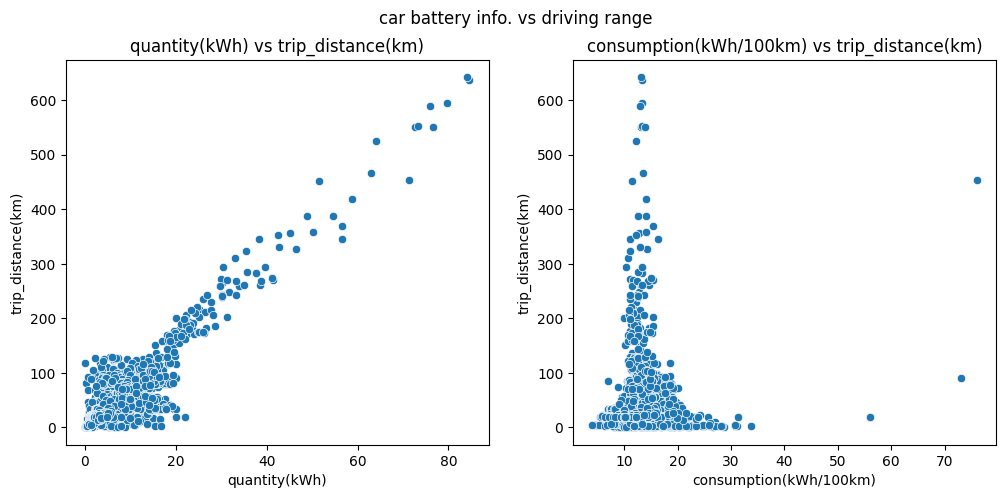

In [28]:
# Quantity on trip distance
plt.figure(figsize=(12, 5))
plt.suptitle("car battery info. vs driving range")
plt.subplot(1, 2, 1)
plt.title("quantity(kWh) vs trip_distance(km)")
sns.scatterplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = df)

plt.subplot(1, 2, 2)
plt.title("consumption(kWh/100km) vs trip_distance(km)")
sns.scatterplot(x = 'consumption(kWh/100km)', y = 'trip_distance(km)', data = df)



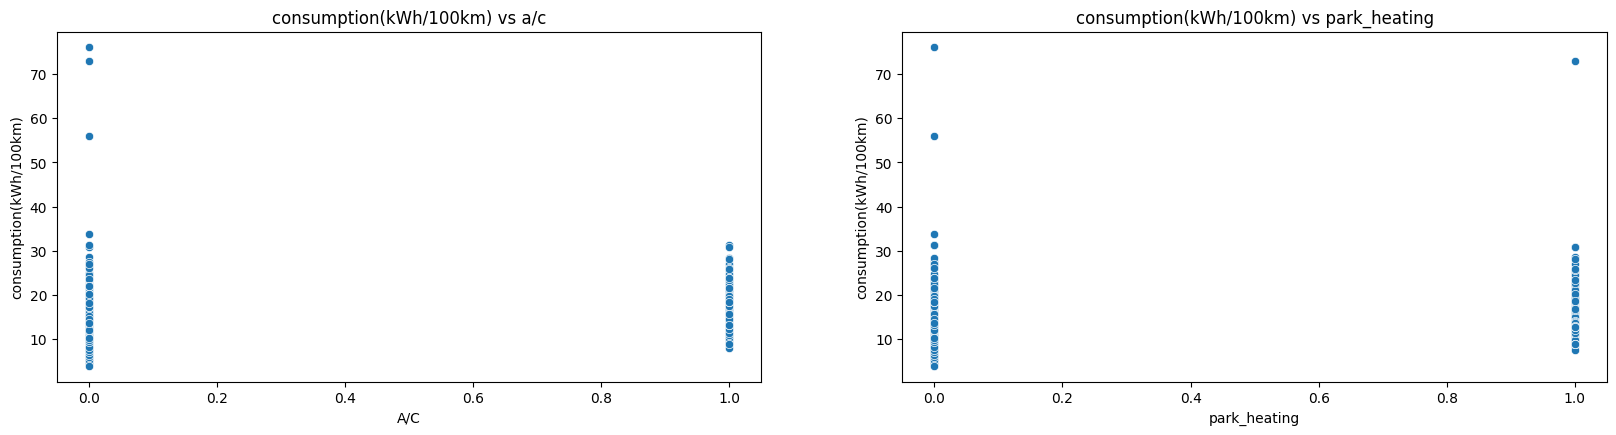

In [29]:
# a/c and park_heating in energy consumption

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("consumption(kWh/100km) vs a/c")
sns.scatterplot(x = 'A/C', y = 'consumption(kWh/100km)', data = df)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs park_heating")
sns.scatterplot(x = 'park_heating', y = 'consumption(kWh/100km)', data = df)
plt.show()

Observation

1.   quantity above 20kwh is directly proportional to trip distance.
2.   quantity in range 0 to 20, maynot alone determine the trip distance, we need to combine some more features to determine the tripdistance for quantity kwh.
1.   trip distance is higher in EV's having energy consumption range in 10 to 20.

1.   The energy consumption levels are higher with A/C on and park heating (range is within no park_heating)comparatively.











#Multivariate Chart 

<ipython-input-30-1a69e8025221>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-30-1a69e8025221>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


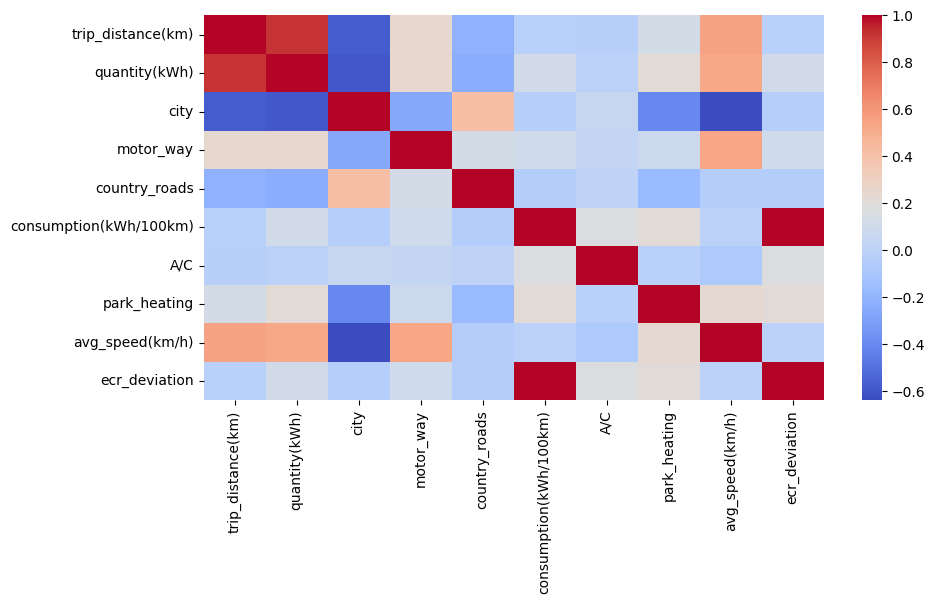

In [30]:
df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

Observations

tire_type feature has no effect in predicting distance_range

'city', 'motor_way', 'driving_style', 'avg_speed(km/h)' impacts the trip distance.

A/C on has some effect on consumption and consumption have effect on driving range.

quantity above 20kwh is directly proportional to trip distance.

Outliers

In Quantity, We can see the outliers in range >= 40
In Energy Consumption, very few outliers above 50 kwh/100km
In Avg Speed, few outliers are below 10 and above 80 km/h

In [31]:
outliers_df = df[
    (df['quantity(kWh)'] > 40) |
    (df['consumption(kWh/100km)'] > 50) |
    (df['avg_speed(km/h)'] < 10) |
    (df['avg_speed(km/h)'] > 80)
]
outliers_df.shape
outliers_df

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
38,82.0,15.13,Winter tires,0,0,1,Normal,15.2,0,1,83.0,-1.6
78,74.0,14.51,Summer tires,0,1,0,Normal,15.2,0,1,85.0,-1.6
100,73.0,12.72,Summer tires,0,1,0,Normal,13.6,0,0,82.0,-3.2
102,72.0,13.22,Summer tires,0,1,0,Normal,12.9,0,0,83.0,-3.9
115,71.0,13.67,Summer tires,0,1,0,Normal,14.2,0,0,85.0,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,5.0,0.60,Summer tires,1,0,0,Moderate,12.0,0,0,2.0,-4.8
3067,589.0,75.98,Summer tires,0,1,0,Moderate,12.9,0,0,68.0,-3.9
3075,451.0,51.41,Summer tires,0,1,0,Moderate,11.4,0,0,60.0,-5.4
3081,2.0,0.55,Summer tires,1,0,1,Normal,27.5,0,0,6.0,10.7


In [32]:
non_outliers_df = df.drop(index = outliers_df.index)
non_outliers_df

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,50.0,12.29,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,43.0,8.68,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,44.0,1.50,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,76.0,14.44,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
5,15.0,6.84,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
3340,26.0,5.62,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,77.0,14.25,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,26.0,4.97,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,20.0,4.76,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


#Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [34]:
# Encode the categorical variables tire_type and driving style
# Encode the driving style first with Ordinal Encoding. as Normal, Moderate, Fast as some order and significance.

ordinalEncoder = OrdinalEncoder(categories=[['Normal', 'Moderate', 'Fast']])
non_outliers_df['encoded_driving_style'] = ordinalEncoder.fit_transform(non_outliers_df.driving_style.values.reshape(-1,1))
#tire_type
labelEncoder = LabelEncoder()
non_outliers_df['encoded_tire_type'] = labelEncoder.fit_transform(non_outliers_df.tire_type)

# drop two columns
non_outliers_df.drop(columns = ['tire_type', 'driving_style'], inplace=True)

display(non_outliers_df.tail(5))

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,encoded_driving_style,encoded_tire_type
3340,26.0,5.62,1,1,1,21.6,1,0,45.0,4.8,0.0,1
3341,77.0,14.25,1,1,1,18.5,1,0,42.0,1.7,0.0,1
3342,26.0,4.97,1,1,1,19.1,1,0,23.0,2.3,0.0,1
3343,20.0,4.76,1,1,1,23.8,1,0,46.0,7.0,2.0,1
3344,43.0,7.86,1,1,1,18.3,1,0,18.0,1.5,0.0,1


In [35]:
from sklearn.model_selection import train_test_split

Y = non_outliers_df['trip_distance(km)']
X = non_outliers_df.drop(columns=['trip_distance(km)'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Shape of X train : ", X_train.shape)
print("Shape of X test : ", X_test.shape)
## the data sets are splitted in the same ratio as of Total Data Set with random = 2. 


Shape of X train :  (2609, 11)
Shape of X test :  (653, 11)


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
reg = RandomForestRegressor(n_estimators=50, random_state=0)
#training the dataset
reg.fit(X_train,Y_train.values.ravel())
reg.score(X_test, Y_test)


0.9094057141193793

Mean Squared Error: 183.89750214395102
Root Mean Squared Error: 13.560881318850594
R-squared: 0.9094057141193793


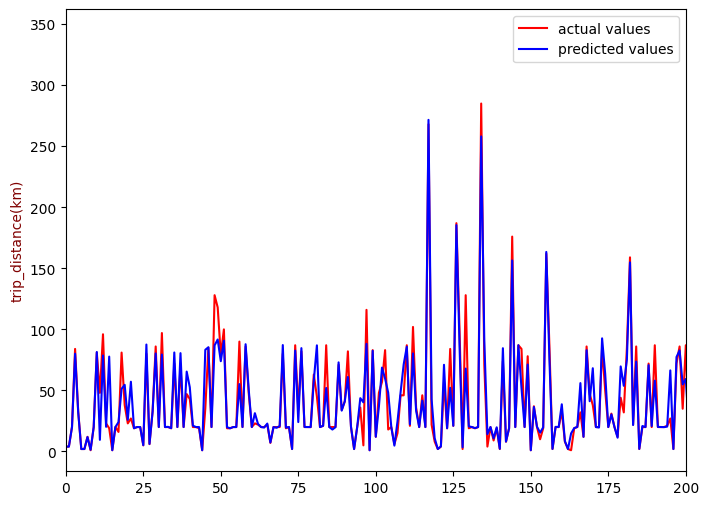

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
x1 = np.array(Y_test)
y_pred = reg.predict(X_test)
y1 = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x1, color='red')
plt.plot(y1,color='blue')
plt.xlim(0,200)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
# plt.xlabel("Index", color='maroon')
plt.ylabel("trip_distance(km)", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

In [44]:
#deep MLP
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the third hidden layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the fourth hidden layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)
y2_pred = model.predict(X_test)


Epoch 1/50
82/82 [==============================] - 1s 2ms/step - loss: 1560.1129
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 307.5136
Epoch 3/50
82/82 [==============================] - 0s 4ms/step - loss: 251.4478
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 240.1263
Epoch 5/50
82/82 [==============================] - 0s 4ms/step - loss: 223.4104
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 214.0748
Epoch 7/50
82/82 [==============================] - 0s 4ms/step - loss: 209.0164
Epoch 8/50
82/82 [==============================] - 0s 3ms/step - loss: 200.7034
Epoch 9/50
82/82 [==============================] - 0s 4ms/step - loss: 194.2072
Epoch 10/50
82/82 [==============================] - 0s 4ms/step - loss: 192.3814
Epoch 11/50
82/82 [==============================] - 0s 2ms/step - loss: 189.3826
Epoch 12/50
82/82 [==============================] - 0s 3ms/step - loss: 187.8575
Epoch 13/50
82/82 [=====

Mean Squared Error: 141.019994252331
Root Mean Squared Error: 11.875183967094195
R-squared: 0.9305286612094454


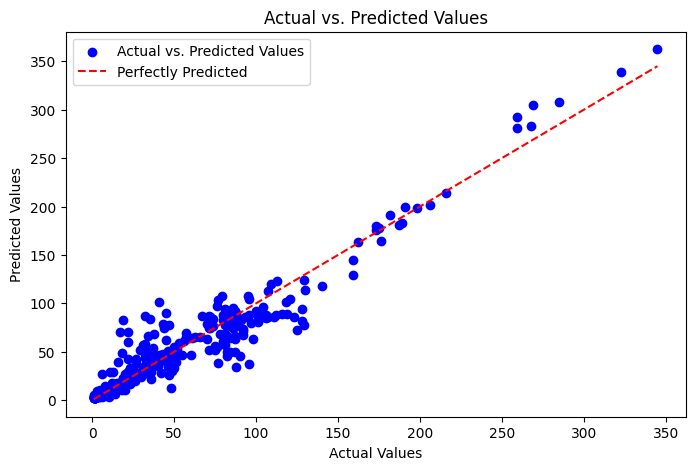

In [45]:
# Plot the graph
mse = mean_squared_error(Y_test, y2_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y2_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
plt.figure(figsize=(8, 5))
plt.scatter(Y_test, y2_pred, c='blue', label='Actual vs. Predicted Values')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', label='Perfectly Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()





In [46]:

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

# Train the model
model2.fit(X_train, Y_train)

# Predict on the test set
y3_pred = model2.predict(X_test)



Mean Squared Error: 314.2621771765802
Root Mean Squared Error: 17.727441360122455
R-squared: 0.8451835550310227


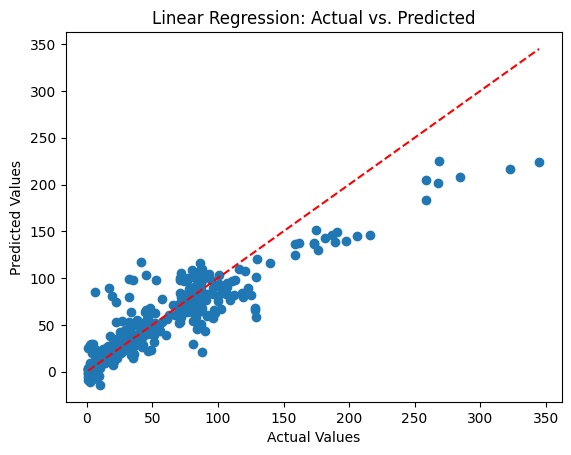

In [47]:
# Evaluate the model
mse = mean_squared_error(Y_test, y3_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y3_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
plt.scatter(Y_test, y3_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')  # Plot the diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

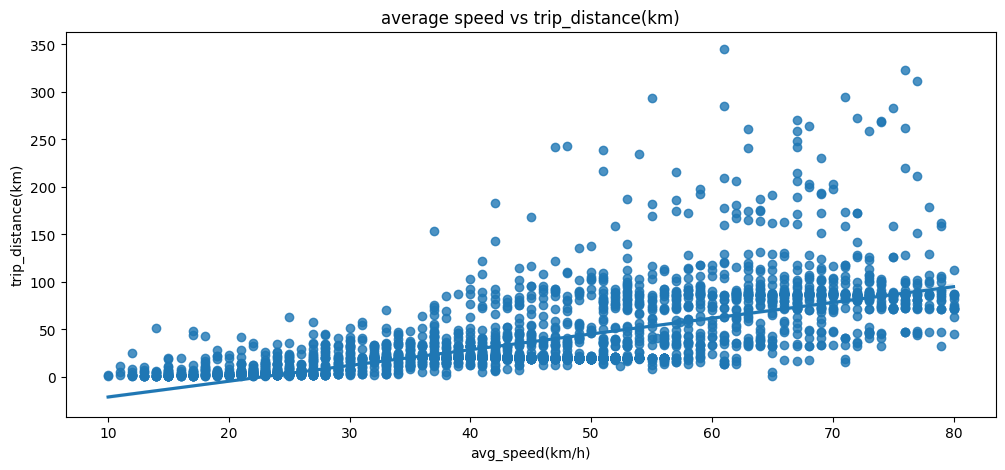

In [48]:
plt.figure(figsize=(12, 5))
plt.title("average speed vs trip_distance(km)")
sns.regplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = non_outliers_df)
plt.show()

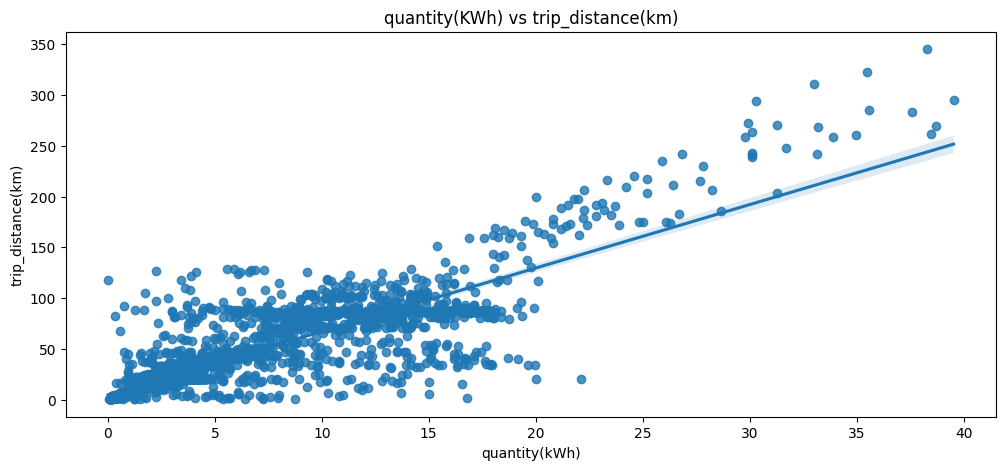

In [49]:
plt.figure(figsize=(12, 5))
plt.title("quantity(KWh) vs trip_distance(km)")
sns.regplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = non_outliers_df)
plt.show()